<h1 style="color:#FA7A35;font-family:Georgia">Credit Card Fraud Detection Case Study</h1>

## Credit Card Fraud Detection
### Problem Statement

The problem statement chosen for this demonstration is to predict fraudulent credit card transactions with the help of machine learning models.

In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.

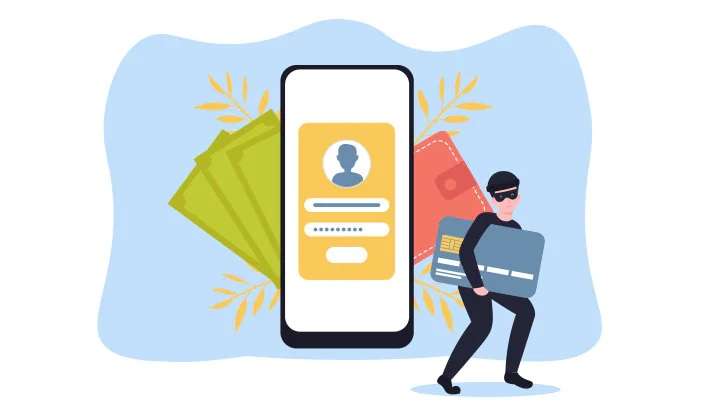

### Goal
Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants.Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.

### Business Understanding

In recent times, the number of fraud transactions has increased drastically, due to which credit card companies are facing a lot of challenges. For many banks, retaining high profitable customers is the most important business goal. Banking fraud, however, poses a significant threat to this goal. In terms of substantial financial loss, trust and credibility, banking fraud is a concerning issue for both banks and customers alike. With the rise in digital payment channels, the number of fraudulent transactions is also increasing as fraudsters are finding new and different ways to commit such crimes.

Finex is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis. Many customers have been complaining about unauthorised transactions being made through their credit/debit cards. It has been reported that fraudsters use stolen/lost cards and hack private systems to access the personal and sensitive data of many cardholders. They also indulge in ATM skimming at various POS terminals such as gas stations, shopping malls, and ATMs that do not send alerts or do not have OTP systems through banks. Such fraudulent activities have been reported to happen during non-peak and odd hours of the day leaving no room for suspicion.
Now, Finex is also not really equipped with the latest financial technologies, and it is becoming difficult for the bank to track these data breaches on time to prevent further losses.



# **1. Mounting GDrive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

# **2. Importing Libraries**

In [1]:
!pip install haversine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import haversine as hs
import seaborn as sns
from sklearn.preprocessing import StandardScaler
## remove warning messages
import warnings
warnings.filterwarnings("ignore")

# **3. Importing Training Data**


```
Reading and understanding data
```



In [3]:
# Loading Data into pandas data frame
df=pd.read_csv("fraudTrain.csv", index_col=0)

In [4]:
# printing the top 5 rows of the data frame
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [5]:
# Checking for the count of rows and columns.
df.shape

(1296675, 22)

In [6]:
# printing data information with data types and non-null count for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
# examine the numerical columns in the data frame
df.describe()

cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02  0.000000e+00  
25%    7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01  0.000000e+00  
50%    2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01  0.000000e+00  
75%    2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01  0.000000e+00  
max    2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [8]:
# scanning Number of Null/Empty values in  each column
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
# Count of Duplicated Rows in the Data Frame
df.duplicated().sum()

0

Observations:
  1. The data set has a total of 1296675 rows and 22 columns.
  2. The target variable is the column - is_fraud.
  3. There are no null values in the training data set
  4. There are no duplicate datas available.


# **4. Data Perparation**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

### **4.1 Droping the columns :**
  1. cc_cum - since credit card numbers are unique, it does not add any value to the model.
  2. first and last - names does not add an value to the model.
  3. street, city, zip, state - since huge amount of streets, city and zipcode are present, creating dummy variables for each street will make the model complex.
  4. job - since there are large amounts of categories present in the job column, creating dummy variables for each category will create a huge sparse matrix
  5. trans_num - since transaction numbers are unique, it does not add any value to the model.
  6. unix_time - since we have already extracted the time from trans_date_trans_time column, unix time is not required
  7. merchant - Since there are many no of categories in the merchant column,creating dummy variables for each category will create a huge sparse matrix

In [11]:
df=df.drop(['cc_num','first','last','street', 'city', 'zip','job','trans_num','unix_time','merchant','state'], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   lat                    1296675 non-null  float64
 5   long                   1296675 non-null  float64
 6   city_pop               1296675 non-null  int64  
 7   dob                    1296675 non-null  object 
 8   merch_lat              1296675 non-null  float64
 9   merch_long             1296675 non-null  float64
 10  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 118.7+ MB


### **4.1 Handling column dob**

In [13]:
#splitting the trans_date_trans_time column into date column
df['date']=pd.to_datetime(df.trans_date_trans_time).dt.date
#converting the data type from object to date format
df.dob=pd.to_datetime(df.dob).dt.date
#creating a new variable called age by subtracting the transaction date and dob
df['age']=(((df.date-df.dob).dt.days)/365).astype(int)
#dropping the column dob
df=df.drop('dob', axis=1)

### **4.2 Handling column trans_date_trans_time**

In [14]:
#binning the trans_date_trans_time column into Morning, noon, evening, late_evening, night and late_night
bins=[0,5,12,17,19,21,24]
labels=['late_night', 'morning', 'noon', 'eveing', 'late_evening', 'night']
#converting the column trans_date_trans_time data type from object to datetime
df.trans_date_trans_time=pd.to_datetime(df.trans_date_trans_time)
#creating a new variable named time_of_day to store the binned values
df['time_of_day']=pd.cut(df.trans_date_trans_time.dt.hour, bins, labels=labels, right=False)

In [15]:
#binning the column trans_date_trans_time into days of the week and storing in column days_of_week
df['days_of_week']=df.trans_date_trans_time.dt.day_name()
df['days_of_week'] = df['days_of_week'].map({'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4,
                                                          'Friday':5, 'Saturday':6, 'Sunday': 7})

In [16]:
#dropping the column trans_date_trans_time and date
df=df.drop(['trans_date_trans_time','date'], axis=1)

### **4.3 Handling column lat, long, merch_lat, merch_long**

In [17]:
#calculating the distance between the base location and merchant location in kms using haversine
df['distance'] = df.apply(lambda row: hs.haversine((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])), axis=1)

In [18]:
#converting float to int
df.distance=df.distance.astype(int)

In [19]:
#dropping the columns lat, long, merch_lat, and merch_long as they individually do not add any value to the model
df=df.drop(['lat','long','merch_lat','merch_long'], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   category      1296675 non-null  object  
 1   amt           1296675 non-null  float64 
 2   gender        1296675 non-null  object  
 3   city_pop      1296675 non-null  int64   
 4   is_fraud      1296675 non-null  int64   
 5   age           1296675 non-null  int32   
 6   time_of_day   1296675 non-null  category
 7   days_of_week  1296675 non-null  int64   
 8   distance      1296675 non-null  int32   
dtypes: category(1), float64(1), int32(2), int64(3), object(2)
memory usage: 80.4+ MB


# **5. Dealing with outliers**

In [21]:
df.describe()

amt      city_pop      is_fraud           age  days_of_week  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   7.035104e+01  8.882444e+04  5.788652e-03  4.552822e+01  4.070604e+00   
std    1.603160e+02  3.019564e+05  7.586269e-02  1.740895e+01  2.198153e+00   
min    1.000000e+00  2.300000e+01  0.000000e+00  1.300000e+01  1.000000e+00   
25%    9.650000e+00  7.430000e+02  0.000000e+00  3.200000e+01  2.000000e+00   
50%    4.752000e+01  2.456000e+03  0.000000e+00  4.400000e+01  4.000000e+00   
75%    8.314000e+01  2.032800e+04  0.000000e+00  5.700000e+01  6.000000e+00   
max    2.894890e+04  2.906700e+06  1.000000e+00  9.500000e+01  7.000000e+00   

           distance  
count  1.296675e+06  
mean   7.561487e+01  
std    2.911878e+01  
min    0.000000e+00  
25%    5.500000e+01  
50%    7.800000e+01  
75%    9.800000e+01  
max    1.520000e+02

The numerical columns present are
1. amt
2. city_pop
3. age
4. distance

### **5.1 Checking for outliers in column amt**

<Axes: >

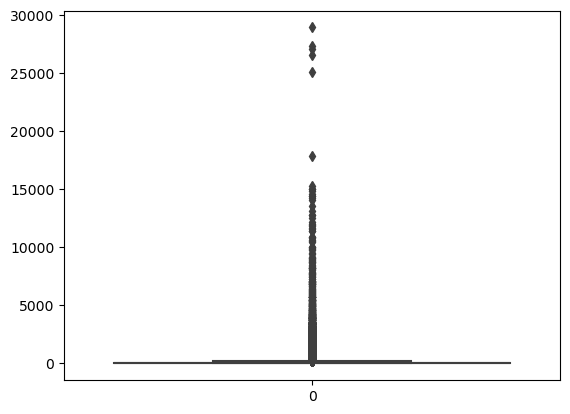

In [22]:
#boxplot of the column amt
sns.boxplot(df.amt)

<Axes: xlabel='amt', ylabel='Density'>

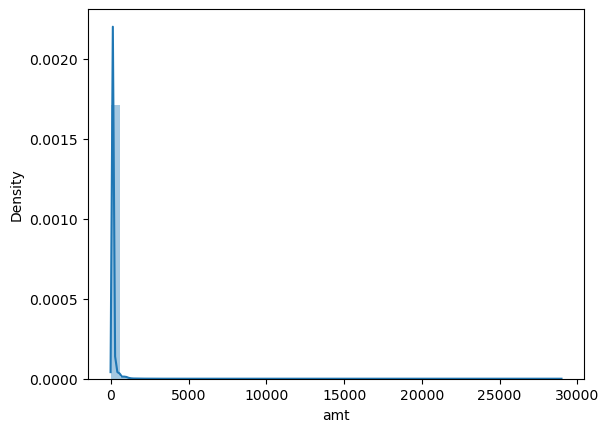

In [23]:
#distribution plot of the column amt
sns.distplot(df.amt)

Since the column amt is crucial to our model, eventhough >90% the distrribution of the data in the column lies between 0 to 5000, let's not eliminate any values.

### **5.2 Checking for outliers in column city_pop**

In [24]:
#checking outliers in the column city_pop
df.city_pop.describe()

count    1.296675e+06
mean     8.882444e+04
std      3.019564e+05
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      2.906700e+06
Name: city_pop, dtype: float64

<Axes: >

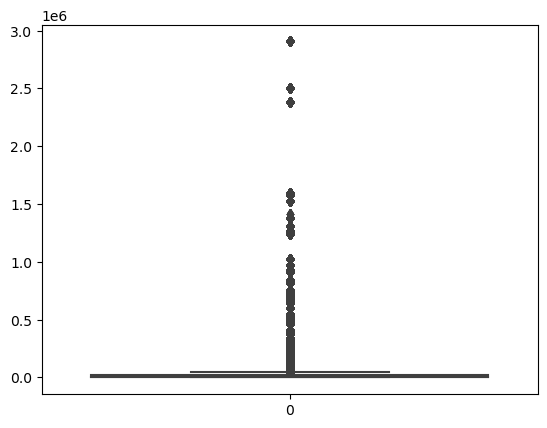

In [25]:
#boxplot of the column city_pop
sns.boxplot(df.city_pop)

<Axes: xlabel='city_pop', ylabel='Density'>

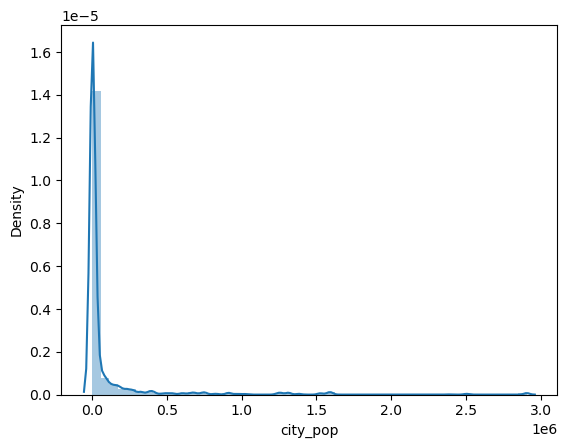

In [26]:
#distribution plot of the column city_pop
sns.distplot(df.city_pop)

more than 90% of data lies between 0 to 0.5 in city_pop

### **5.3 Checking for outliers in column age**

<Axes: >

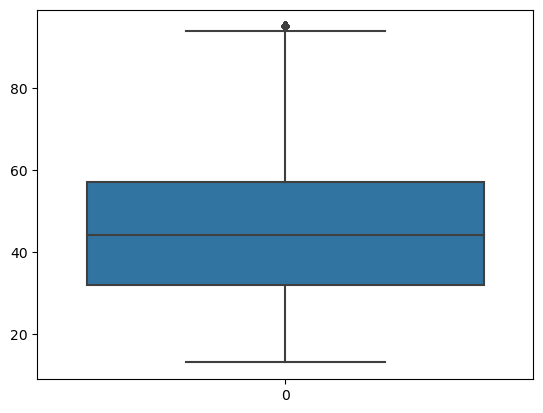

In [27]:
#checking outliers in the column age
sns.boxplot(df.age)

<Axes: xlabel='age', ylabel='Density'>

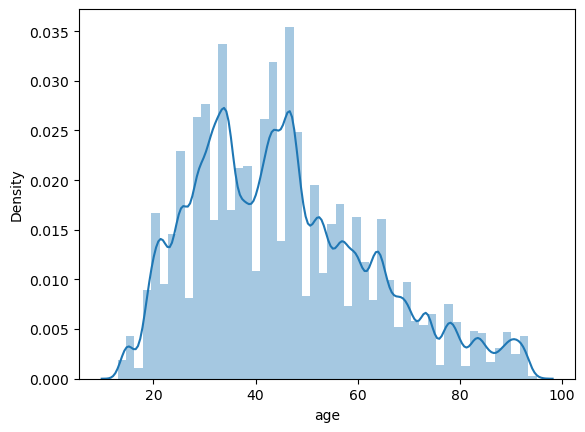

In [28]:
#distribution plot of the column age
sns.distplot(df.age)

The column age does not have any outliers

### **5.4 Checking for outliers in column distance**

<Axes: >

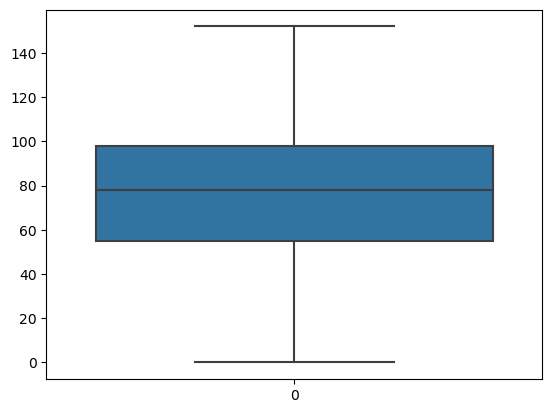

In [29]:
#checking outliers in the column distance
sns.boxplot(df.distance)

<Axes: xlabel='distance', ylabel='Density'>

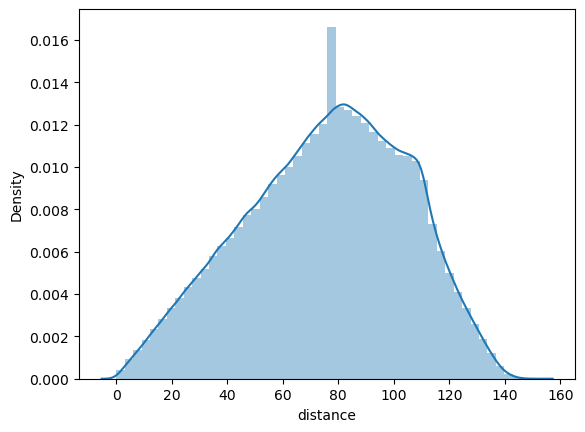

In [30]:
#distribution plot of the column Distance
sns.distplot(df.distance)

The column Distance does not have any outliers

# **6. Univariate Analysis for categorical values**

In [31]:
df.head()

category     amt gender  city_pop  is_fraud  age time_of_day  \
0       misc_net    4.97      F      3495         0   30  late_night   
1    grocery_pos  107.23      F       149         0   40  late_night   
2  entertainment  220.11      M      4154         0   56  late_night   
3  gas_transport   45.00      M      1939         0   52  late_night   
4       misc_pos   41.96      M        99         0   32  late_night   

   days_of_week  distance  
0             2        78  
1             2        30  
2             2       108  
3             2        95  
4             2        77

the categorical columns are :
1. category
2. gender
3. state
4. time_of_day
5. days_of_week

In [32]:
#function for plotting the columns
def univar_analysis(col):
    plt.figure(figsize=(25, 5))
    ax = sns.countplot(x = col, hue = df.is_fraud, data=df)

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

    plt.xticks(rotation = 90)
    plt.show()

### **6.1 category**

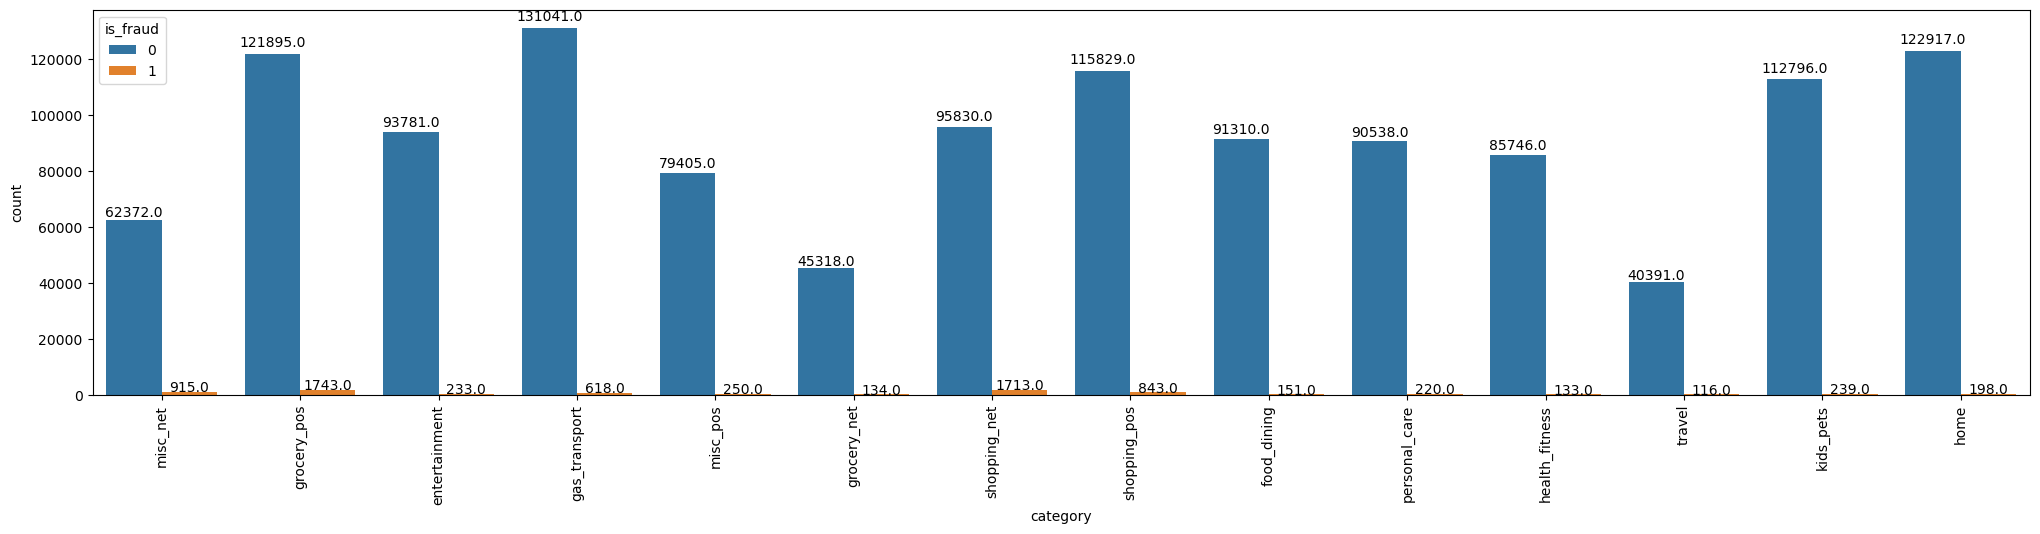

In [33]:
# plotting count plot for category
univar_analysis('category')

Observations:


1.   The highest no of fradulent transactions have occured in the categories grocery_pos and shopping_net
2.  The least no of fraudlent transactions have occured in the categories travel andhealth_fitness.
3.  Huge volume of transactions have occured under the cateegory gas_tranport


### **6.2 Gender**

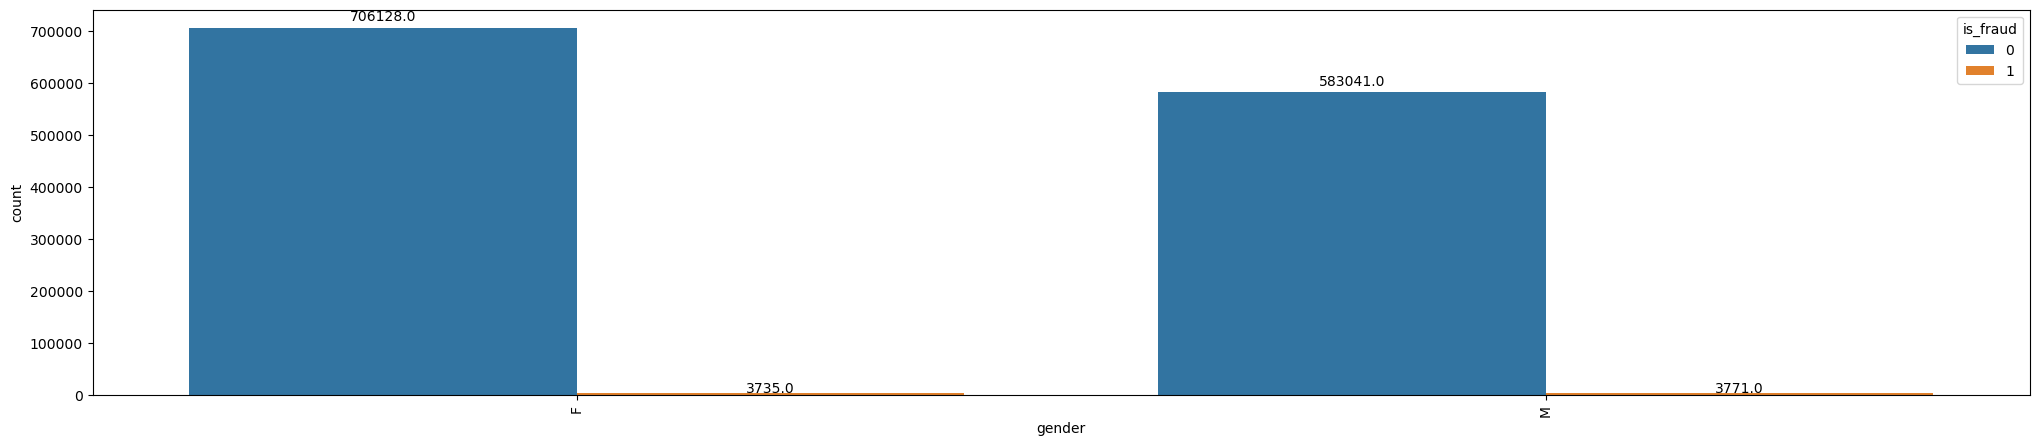

In [34]:
# plotting count plot for gender
univar_analysis('gender')

Observations:


1.   Female gender has higher no of transactions compared to male
2.   The no. of fradulent transactions are almost siimilar for both the genger irrespective of the volume of ransactions



### **6.3 time_of_day**

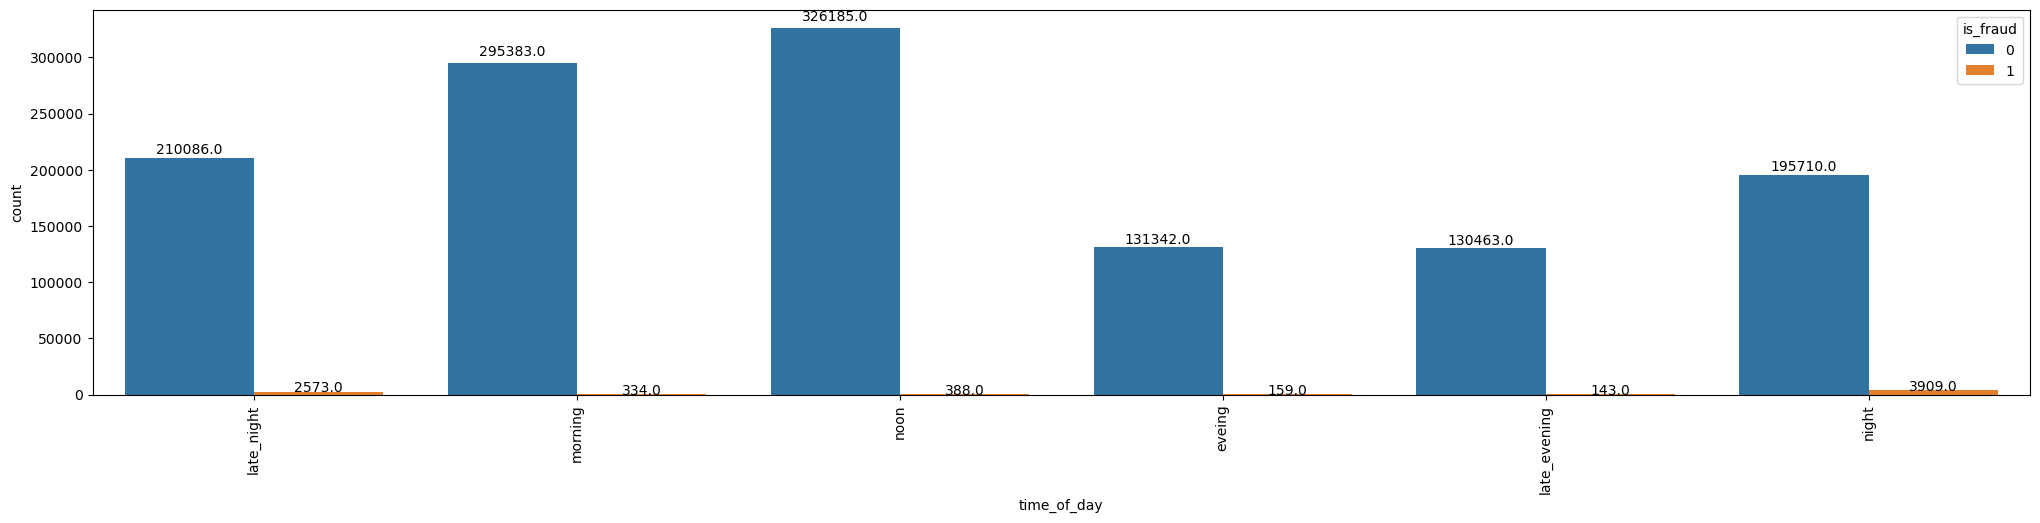

In [35]:
# plotting count plot for time_of_day
univar_analysis('time_of_day')

Observations:


1.   Night and Midnight have highest no of fraudelent transaction irrespectie of huge volume of transactions taking place during noon
2.   Morning and nonn have the highest volume of transactions



### **6.4 days_of_week**

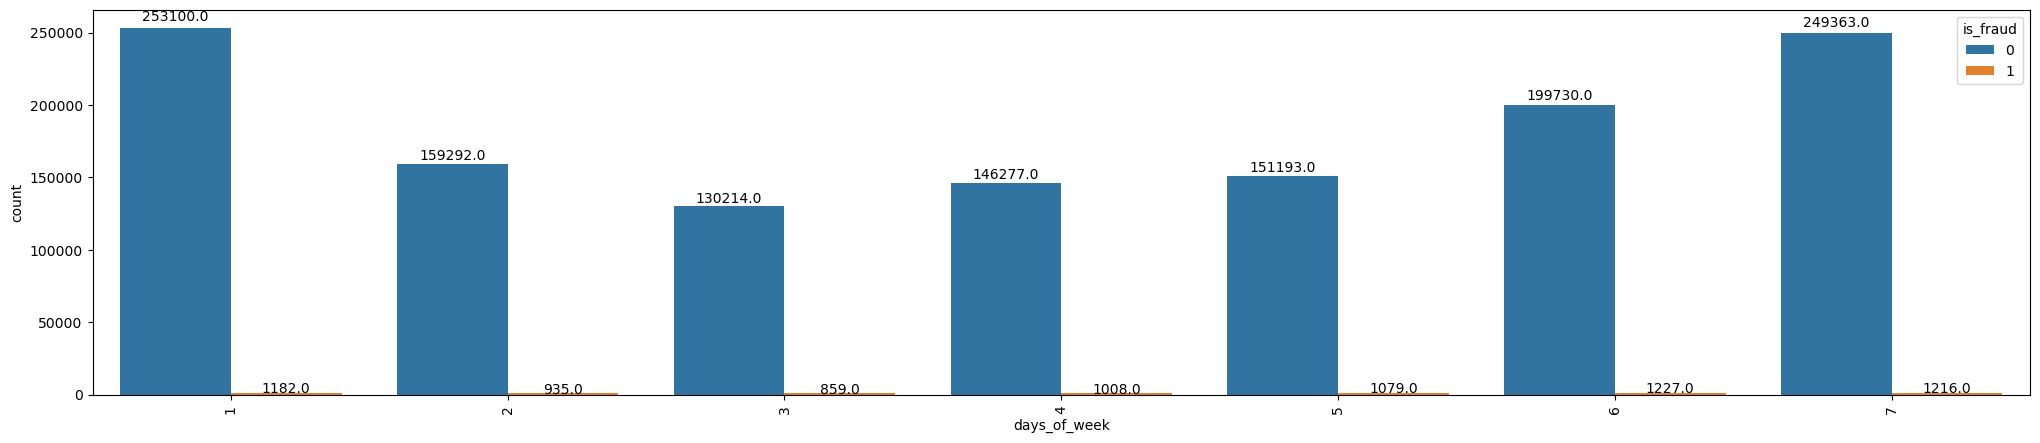

In [36]:
# plotting count plot for days_of_week
univar_analysis('days_of_week')

Observtions:


1.   The no of fraudelent transaction remain almost similar irrespective of he days of the week
2.   Sunday and Monday have the highest volume of transactions



# **7. Correlation**

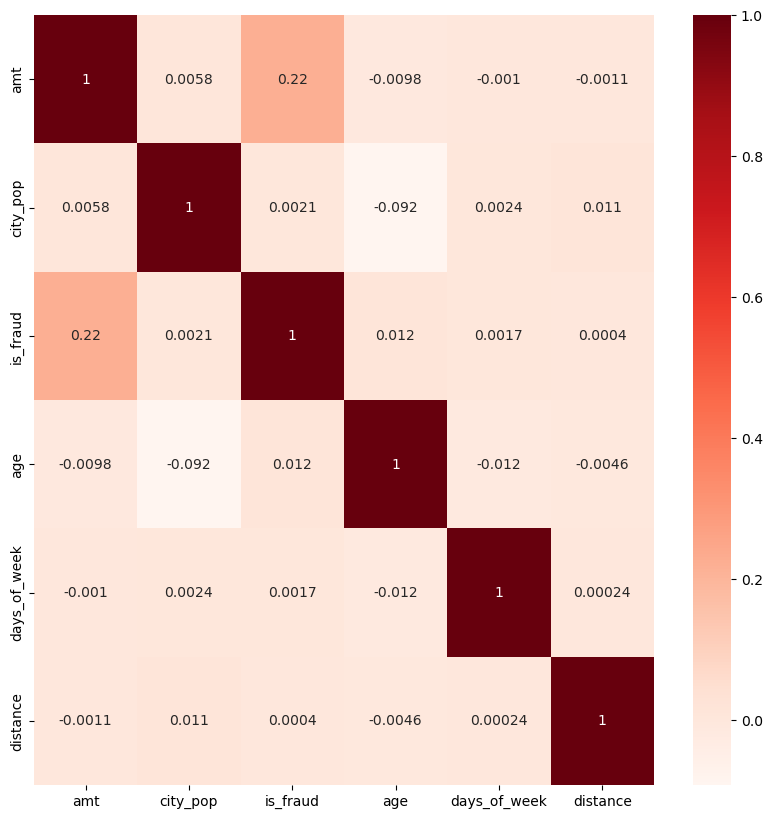

In [37]:
# plotting a correlation values using sns for numerical values
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap= 'Reds')
plt.show()

Observations:


1.   The target variable is_fraud and amt have the highest correlation of 0.22



# **8. Dummy Variables**

Lets create dummy variables for categorical variables:

1. category
2. gender
3. time_of_day




### **8.1 dummy variables -category**

In [38]:
#creating dummy variables for the column category
#One-Hot encoding
dummy=pd.get_dummies(df.category, drop_first=True)
df=pd.concat([df,dummy], axis=1)
df=df.drop('category',axis=1)

### **8.2 dummy variables -Gender**

In [39]:
dummy=pd.get_dummies(df.gender, drop_first=True,).rename(columns={'M':'is_male'})
df=pd.concat([df,dummy], axis=1)
df=df.drop('gender', axis=1)

### **8.3 dummy variables -time_of_day**

In [40]:
#creating dummy variables for the column time_of_day
dummy=pd.get_dummies(df.time_of_day, drop_first=True)
df=pd.concat([df,dummy], axis=1)
df=df.drop('time_of_day', axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   amt             1296675 non-null  float64
 1   city_pop        1296675 non-null  int64  
 2   is_fraud        1296675 non-null  int64  
 3   age             1296675 non-null  int32  
 4   days_of_week    1296675 non-null  int64  
 5   distance        1296675 non-null  int32  
 6   food_dining     1296675 non-null  uint8  
 7   gas_transport   1296675 non-null  uint8  
 8   grocery_net     1296675 non-null  uint8  
 9   grocery_pos     1296675 non-null  uint8  
 10  health_fitness  1296675 non-null  uint8  
 11  home            1296675 non-null  uint8  
 12  kids_pets       1296675 non-null  uint8  
 13  misc_net        1296675 non-null  uint8  
 14  misc_pos        1296675 non-null  uint8  
 15  personal_care   1296675 non-null  uint8  
 16  shopping_net    1296675 non-null  ui

# **9. Class imbalance**

In [42]:
classes=df['is_fraud'].value_counts()
normal_share=classes[0]/df['is_fraud'].count()*100
fraud_share=classes[1]/df['is_fraud'].count()*100

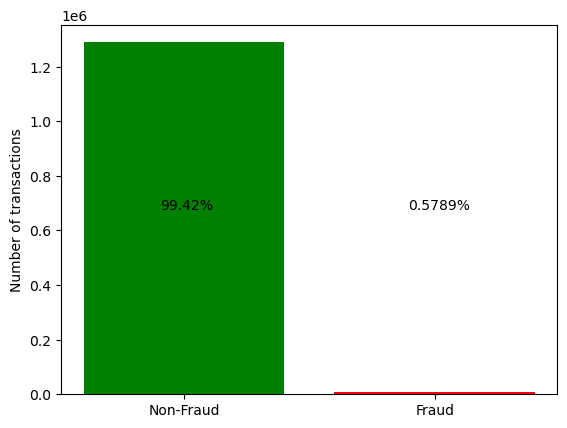

In [43]:
plt.bar(['Non-Fraud','Fraud'], classes, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')
plt.show()

Observations:
1. only 0.58% of the givent data represents the class Fraud

Splitting the train test into X and Y variables

In [44]:
y=df.is_fraud
x=df.drop('is_fraud', axis=1)

Dealing with class imbalance using ADASYN and Smote - oversampling

In [45]:
#Importing smote and adasyn
from imblearn.over_sampling import SMOTE, ADASYN

In [46]:
#Oversampling using smote
X_smote, y_smote = SMOTE(random_state=10).fit_resample(x, y)

In [47]:
#Oversampling using Adasyn
X_ada, y_ada = ADASYN(random_state=10).fit_resample(x, y)

Text(0.5, 1.0, 'Original_data')

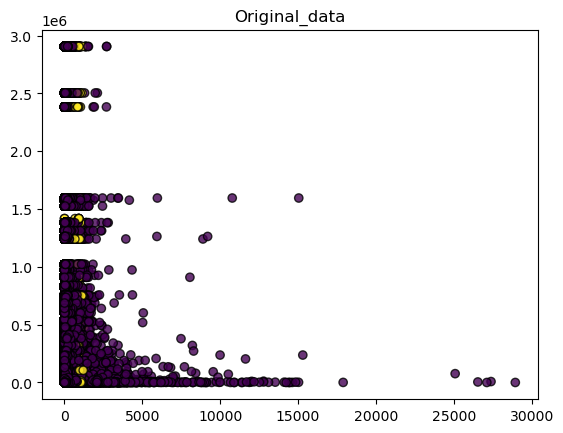

In [48]:
#Ploting the original data
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, alpha=0.8, edgecolor="k")
plt.title('Original_data')

Text(0.5, 1.0, 'Resampling with SMOTE')

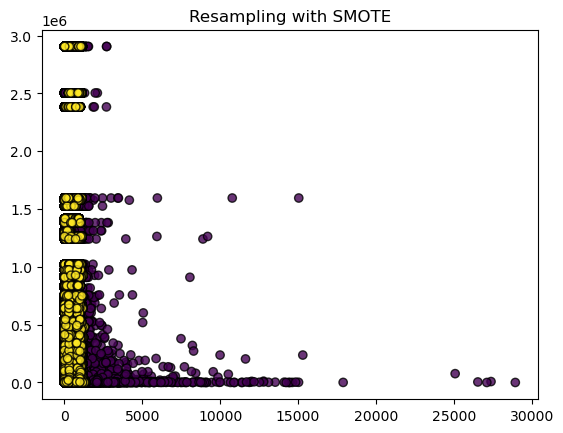

In [49]:
#Plotting the data oversampled using SMOTE
plt.scatter(X_smote.iloc[:, 0], X_smote.iloc[:, 1], c=y_smote, alpha=0.8, edgecolor="k")
plt.title('Resampling with SMOTE')

Text(0.5, 1.0, 'Resampling with ADASYN')

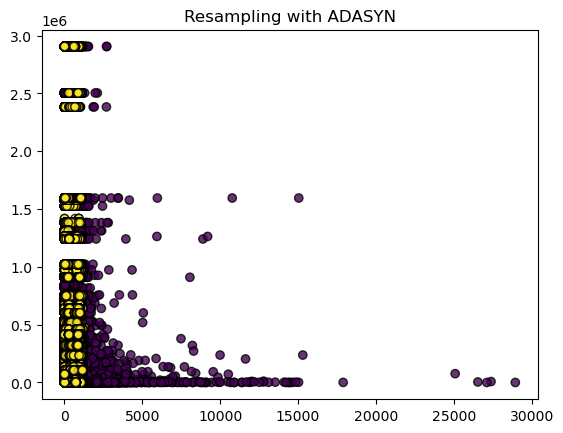

In [50]:
#Ploting the data Oversampled using ADASYN
plt.scatter(X_ada.iloc[:, 0], X_ada.iloc[:, 1], c=y_ada, alpha=0.8, edgecolor="k")
plt.title('Resampling with ADASYN')

# **10. Importing test data**

In [66]:
# Loading Data into pandas data frame
df_test=pd.read_csv("test_modified.csv", index_col=0)

In [67]:
#splitting the test data into x_test and y_test
y_test=df_test.is_fraud
x_test=df_test.drop('is_fraud', axis=1)

# **11. Model Building**

In [144]:
#Importing necessary libraries to check precision and recall score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#importig the necessary libraries for checking the accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, roc_curve
#Function for printing the efficiency and confusion matrix and ROC Curve
def evaluate_model(dt_classifier,X_train,y_train,X_test,y_test):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print(" ")
    print('Recall: ',recall_score(y_train, dt_classifier.predict(X_train)))
    print(" ")
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))

    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print(" ")
    print('Recall: ',recall_score(y_test, dt_classifier.predict(X_test)))
    print(" ")
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

    plt.subplot(1,2,1)
    fpr, tpr, thresholds = roc_curve(y_train, dt_classifier.predict(X_train))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC of Training data')
    print( )
    print(f' AUC score - Training data: {roc_auc_score(y_train,  dt_classifier.predict(X_train))}')
    plt.subplot(1,2,2)
    fpr, tpr, thresholds = roc_curve(y_test, dt_classifier.predict(X_test))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC of Test data')
    print(f' AUC score - Test Data: {roc_auc_score(y_test,  dt_classifier.predict(X_test))}')

In [145]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


In [146]:
#function for plotting the trees
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=x.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

### **11.1 Model Building With Decision Tree**

In [147]:
#Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


#### 11.1.1 model building with unsampled data

In [148]:
dt = DecisionTreeClassifier(random_state=10)

In [149]:
# Create the parameter grid based on the results of random search 
params_dt = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}

In [150]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params_dt, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [151]:
%%time
grid_search.fit(x, y)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
CPU times: total: 9.25 s
Wall time: 3min 8s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [152]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=10)

In [153]:
grid_search.best_score_

0.998021092432029

In [154]:
optimized_dt=grid_search.best_estimator_

In [155]:
optimized_dt.fit(x,y)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=10)

Train Accuracy : 0.9983010391964062
 
Recall:  0.7524646949107381
 
Train Confusion Matrix:
[[1288824     345]
 [   1858    5648]]
--------------------------------------------------
Test Accuracy : 0.9984398589934841
 
Recall:  0.7095571095571096
 
Test Confusion Matrix:
[[553330    244]
 [   623   1522]]

 AUC score - Training data: 0.8760985403284525
 AUC score - Test Data: 0.8545581687055094


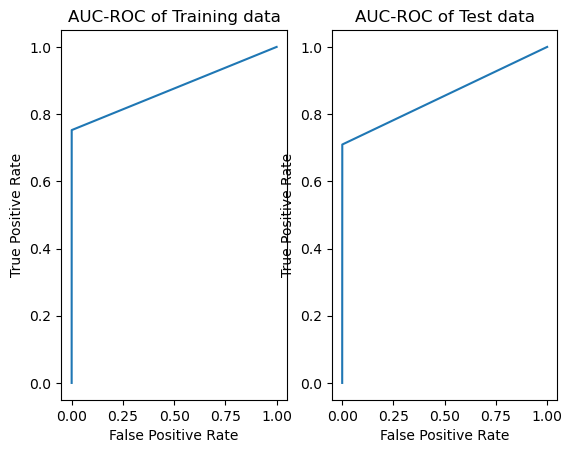

In [156]:
evaluate_model(optimized_dt,x,y,x_test,y_test)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.78512 to fit

(process:18572): GLib-GIO-WARNING **: 10:08:21.997: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:18572): GLib-GIO-WARNING **: 10:08:21.997: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.7.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



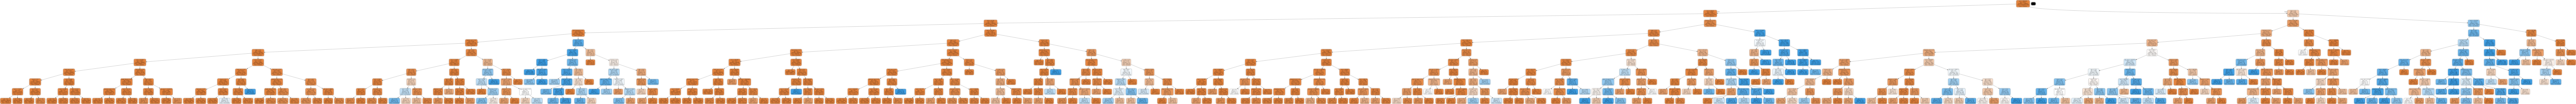

In [157]:
gph = get_dt_graph(optimized_dt)
Image(gph.create_png())

Observations:
1. the accuracy of the training set is 99.8%
2. the accuracy of Test se is 99.8%
3. The recall of training set is 0.75
4. The recall of test set is 0.70
3. The AOC-ROC of training set is 0.876
4. The AOC-ROC of test set is 0.854

#### 11.1.2 model building with oversampled data - SMOTE

In [158]:
dt = DecisionTreeClassifier(random_state=10)

In [159]:
# Create the parameter grid based on the results of random search 
params_dt_smote = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}

In [160]:
grid_search_dt_smote = GridSearchCV(estimator=dt, 
                           param_grid=params_dt_smote, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [161]:
%%time
grid_search_dt_smote.fit(X_smote,y_smote)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
CPU times: total: 15 s
Wall time: 6min 48s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [162]:
grid_search_dt_smote.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=10)

In [163]:
grid_search_dt_smote.best_score_

0.960023472612224

In [164]:
optimized_dt_smote=grid_search_dt_smote.best_estimator_

In [165]:
optimized_dt_smote.fit(X_smote,y_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=10)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.591911 to fit

(process:6832): GLib-GIO-WARNING **: 16:30:45.507: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:6832): GLib-GIO-WARNING **: 16:30:45.522: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.7.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



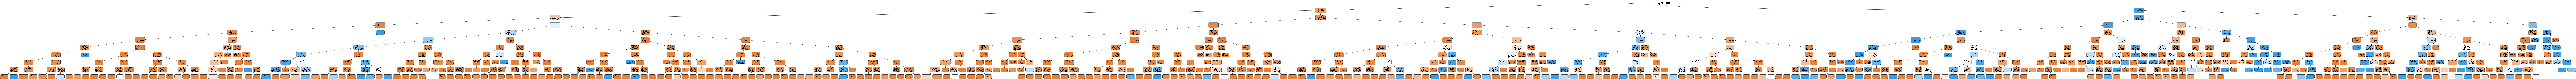

In [242]:
gph = get_dt_graph(optimized_dt_smote)
Image(gph.create_png())

Train Accuracy : 0.9602515263708638
 
Recall:  0.9462320300907019
 
Train Confusion Matrix:
[[1256000   33169]
 [  69316 1219853]]
--------------------------------------------------
Test Accuracy : 0.973398426183017
 
Recall:  0.8848484848484849
 
Test Confusion Matrix:
[[539038  14536]
 [   247   1898]]

 AUC score - Training data: 0.9602515263708638
 AUC score - Test Data: 0.9292950130890495


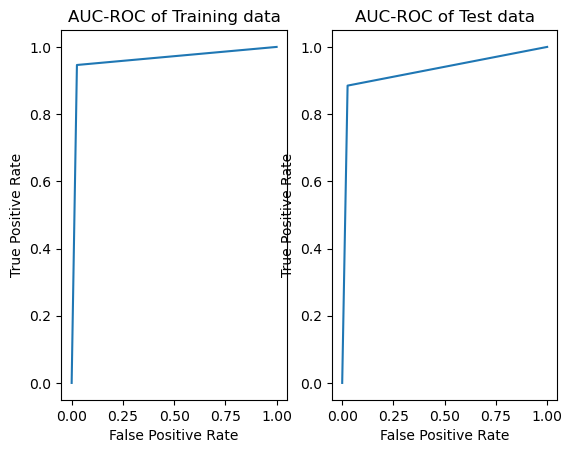

In [166]:
evaluate_model(optimized_dt_smote,X_smote,y_smote,x_test,y_test)

Observations:
1. the accuracy of the training set is 96%
2. the accuracy of Test se is 97.33%
3. The recall of training set is 0.94
4. The recall of test set is 0.88
5. The AOC-ROC of training set is 0.96
6. The AOC-ROC of test set is 0.929

#### 11.1.3 model building with oversampled data - ADASYN

In [167]:
dt = DecisionTreeClassifier(random_state=10)

In [168]:
# Create the parameter grid based on the results of random search 
params_dt_ada = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy']
}

In [169]:
grid_search_dt_ada = GridSearchCV(estimator=dt, 
                           param_grid=params_dt_ada, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [170]:
%%time
grid_search_dt_ada.fit(X_ada,y_ada)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
CPU times: total: 11.6 s
Wall time: 5min 46s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [171]:
grid_search_dt_ada.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=10)

In [172]:
grid_search_dt_ada.best_score_

0.9515559983034361

In [173]:
optimized_dt_ada=grid_search_dt_ada.best_estimator_

In [174]:
optimized_dt_ada.fit(X_ada,y_ada)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=10)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.73495 to fit

(process:24060): GLib-GIO-WARNING **: 16:31:44.528: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:24060): GLib-GIO-WARNING **: 16:31:44.535: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.7.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



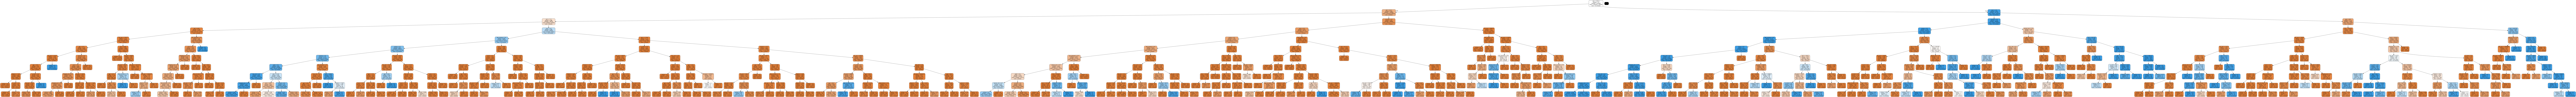

In [243]:
gph = get_dt_graph(optimized_dt_ada)
Image(gph.create_png())

Train Accuracy : 0.9526651121229214
 
Recall:  0.9495569474087197
 
Train Confusion Matrix:
[[1232157   57012]
 [  65090 1225276]]
--------------------------------------------------
Test Accuracy : 0.9546533409870817
 
Recall:  0.8680652680652681
 
Test Confusion Matrix:
[[528657  24917]
 [   283   1862]]

 AUC score - Training data: 0.9526665550963264
 AUC score - Test Data: 0.9115270611552951


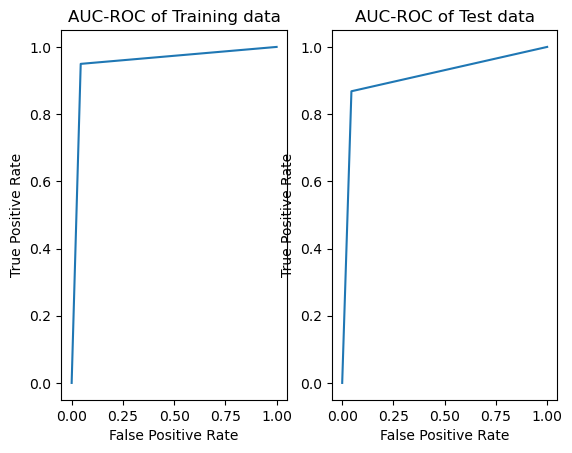

In [175]:
evaluate_model(optimized_dt_ada,X_ada,y_ada,x_test,y_test)

Observations:
1. the accuracy of the training set is 95.26%
2. the accuracy of Test se is 95.46%
3. The recall of training set is 0.949
4. The recall of test set is 0.868
3. The AOC-ROC of training set is 0.95
4. The AOC-ROC of test set is 0.91

### **11.2 Model Building With Random Forest**

In [176]:
#Importing random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [177]:
#Initializing the RF Classifier
rf=RandomForestClassifier(random_state=10)

#### 11.2.1 model building with unsampled data

In [181]:
#defining params for gridsearchcv
params_rf = {
    'max_depth': [3,5,10],
    'min_samples_leaf': [10000,50000,100000],
    'max_leaf_nodes':[5,15,20],
    'n_estimators':[5,10,15],
    'class_weight':['balanced','None']
}

In [182]:
#using Grid search CV on unsampled data
grid_search_rf = GridSearchCV(estimator = rf, param_grid = params_rf,
                          cv = 3, n_jobs = -1, verbose = 2)

In [187]:
%%time
grid_search_rf.fit(x, y)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
CPU times: total: 14.9 s
Wall time: 7min 24s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'None'],
                         'max_depth': [3, 5, 10], 'max_leaf_nodes': [5, 15, 20],
                         'min_samples_leaf': [10000, 50000, 100000],
                         'n_estimators': [5, 10, 15]},
             verbose=2)

In [188]:
#Generating the best estimator from grid search cv
grid_search_rf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=15,
                       min_samples_leaf=10000, n_estimators=5, random_state=10)

In [189]:
#Generating the best score from grid search cv
grid_search_rf.best_score_

0.9597439605143926

In [190]:
#building a nre Rf model with the parameters generated from Grid Search CV
optimized_rf=grid_search_rf.best_estimator_

In [191]:
#Fitting the model
optimized_rf.fit(x,y)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=15,
                       min_samples_leaf=10000, n_estimators=5, random_state=10)

In [192]:
#predicting the training data
y_train_pred=optimized_rf.predict(x)

In [193]:
#predicting the test data
y_test_pred=optimized_rf.predict(x_test)

Train Accuracy : 0.9670788748144292
 
Recall:  0.746203037569944
 
Train Confusion Matrix:
[[1248386   40783]
 [   1905    5601]]
--------------------------------------------------
Test Accuracy : 0.9675681414527846
 
Recall:  0.7333333333333333
 
Test Confusion Matrix:
[[536123  17451]
 [   572   1573]]

 AUC score - Training data: 0.8572839649964462
 AUC score - Test Data: 0.8509045463358709


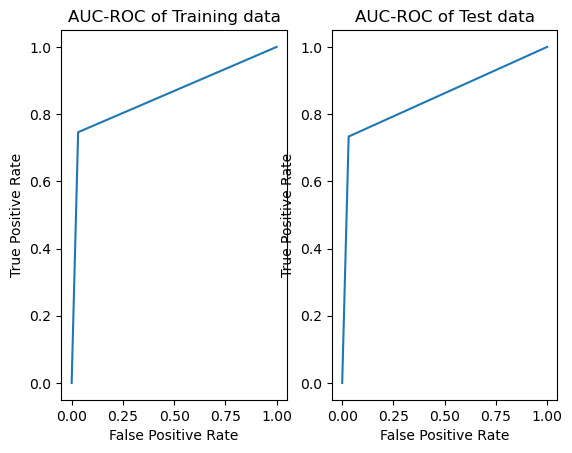

In [194]:
evaluate_model(optimized_rf,x,y,x_test,y_test)

Observations:
1. the accuracy of the training set is 96.70%
2. the accuracy of Test se is 96.75%
3. The recall of training set is 0.74
4. The recall of test set is 0.73
5. The AOC-ROC of training set is 0.85
6. The AOC-ROC of test set is 0.85

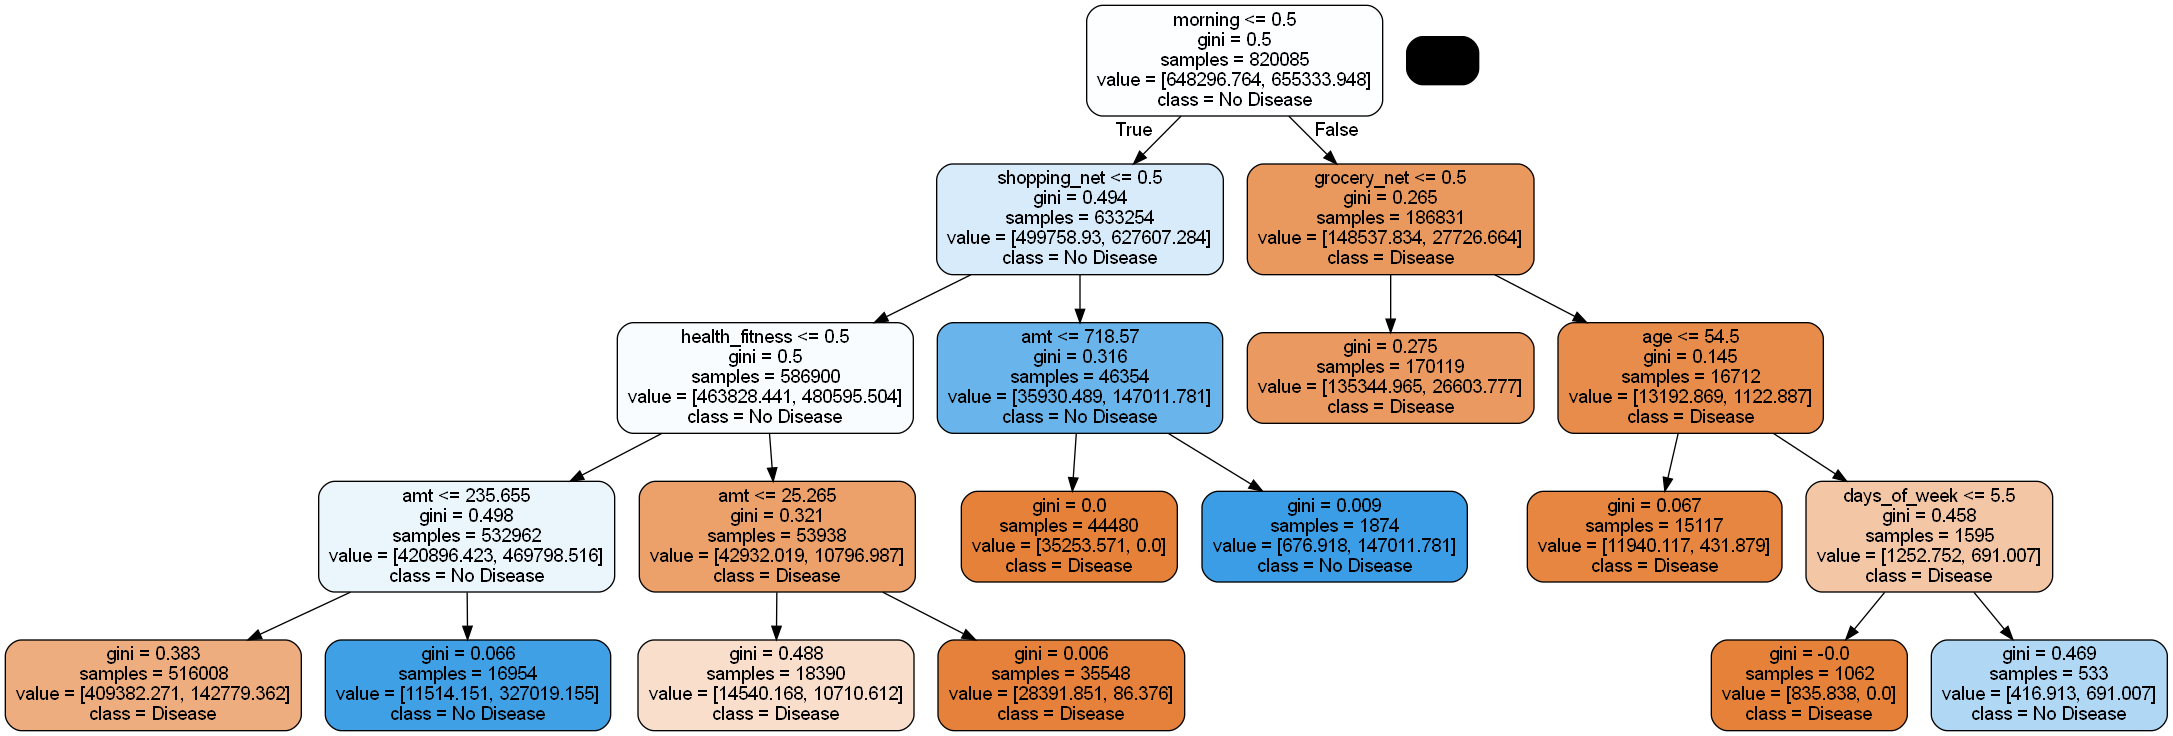

In [206]:
gph = get_dt_graph(optimized_rf_1.estimators_[0])
Image(gph.create_png())

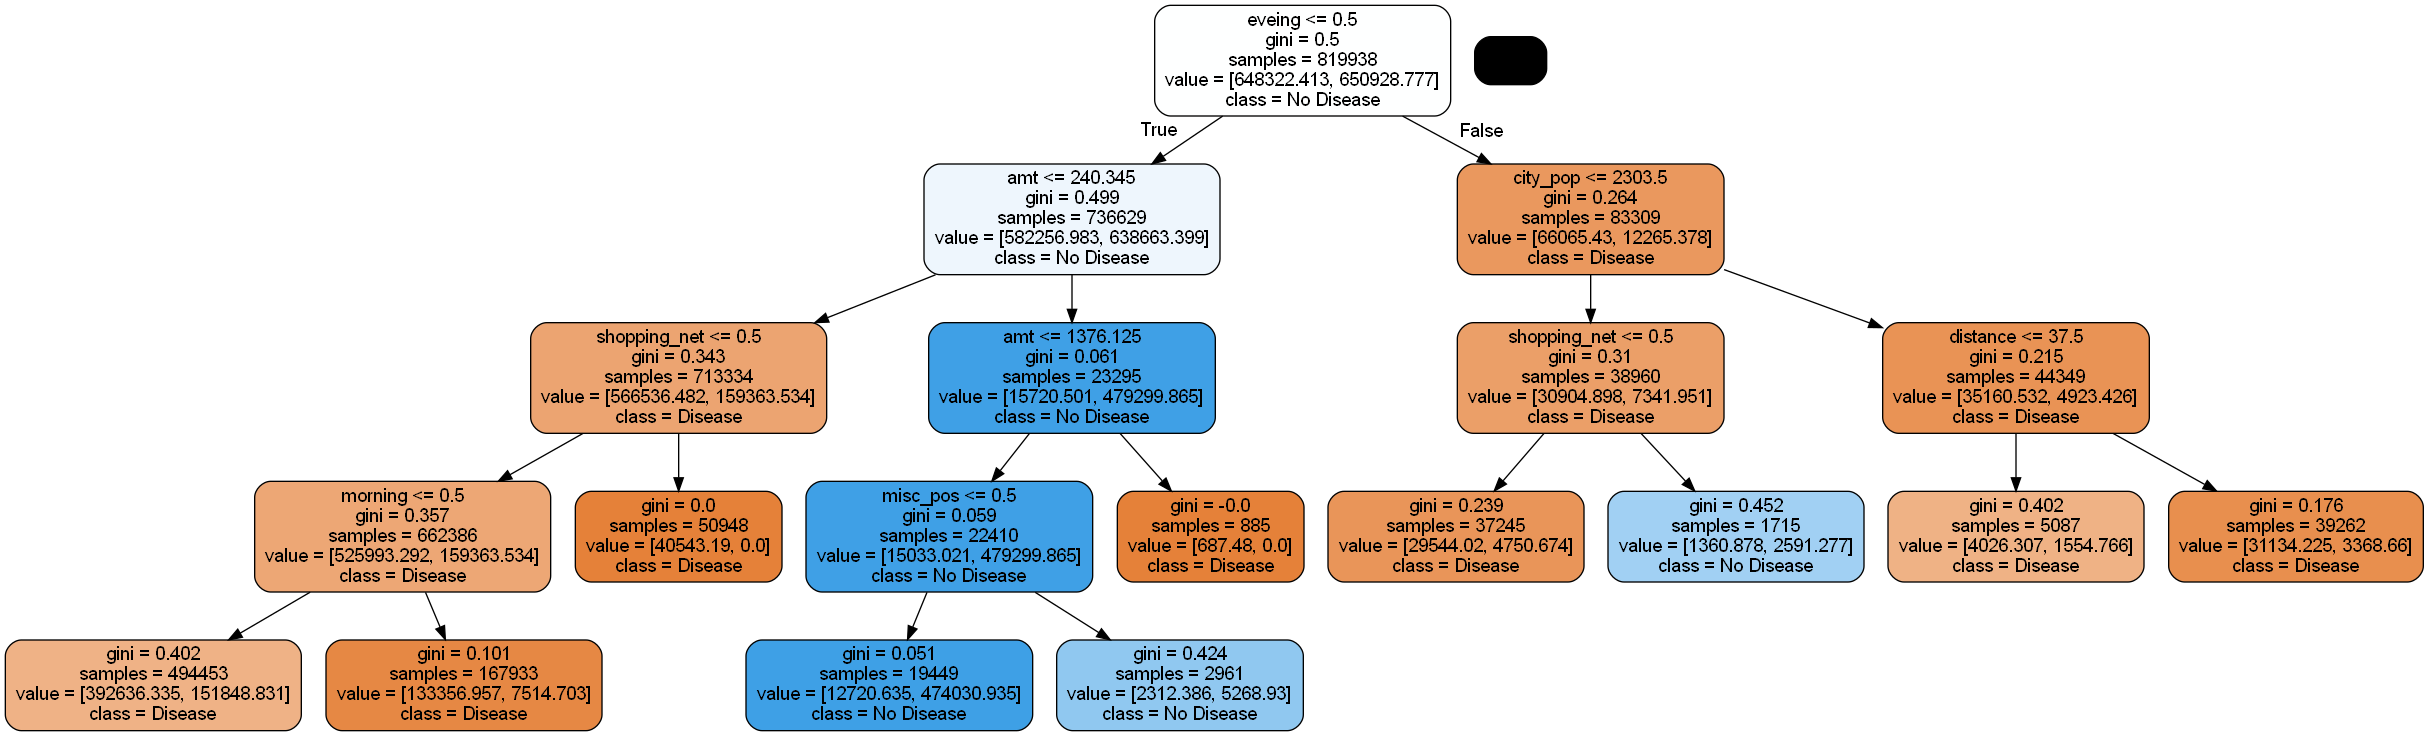

In [207]:
gph = get_dt_graph(optimized_rf_1.estimators_[3])
Image(gph.create_png())

#### 11.2.2 model building with oversampled SMOTE Data

In [211]:
#Initializing the RF Classifier
rf=RandomForestClassifier(random_state=10)

In [212]:
#redefining params for gridsearchcv
params_smote = {
    'max_depth': [4,5,7],
    'min_samples_leaf': [500,1000,10000],
    'max_leaf_nodes':[5,10,15],
    'n_estimators':[4,7,10]
}

In [213]:
#using Grid search CV on SMOTE data
grid_search_smote = GridSearchCV(estimator = rf, param_grid = params_smote,
                          cv = 3, n_jobs = -1, verbose = 2, scoring = "accuracy")

In [214]:
%%time
grid_search_smote.fit(X_smote,y_smote)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
CPU times: total: 18.7 s
Wall time: 12min 53s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 7], 'max_leaf_nodes': [5, 10, 15],
                         'min_samples_leaf': [500, 1000, 10000],
                         'n_estimators': [4, 7, 10]},
             scoring='accuracy', verbose=2)

In [215]:
grid_search_smote.best_estimator_

RandomForestClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=1000,
                       n_estimators=10, random_state=10)

In [216]:
grid_search_smote.best_score_

0.9407432229599068

In [217]:
#building a Rf model with the parameters generated from Grid Search CV
optimized_smote_rf=grid_search_smote.best_estimator_

In [218]:
#Fitting the model
optimized_smote_rf.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=1000,
                       n_estimators=10, random_state=10)

Train Accuracy : 0.9243376935064371
 
Recall:  0.86625260148204
 
Train Confusion Matrix:
[[1266509   22660]
 [ 172423 1116746]]
--------------------------------------------------
Test Accuracy : 0.9815158380404485
 
Recall:  0.6946386946386947
 
Test Confusion Matrix:
[[543957   9617]
 [   655   1490]]

 AUC score - Training data: 0.924337693506437
 AUC score - Test Data: 0.8386330650878842


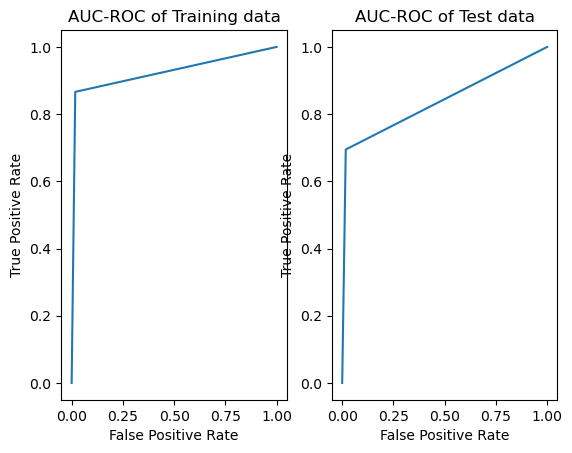

In [219]:
evaluate_model(optimized_smote_rf,X_smote,y_smote,x_test,y_test)

Observations:
1. the accuracy of the training set is 92.43%
2. the accuracy of Test se is 98.15%
3. The recall of training set is 0.86
4. The recall of test set is 0.69
5. The AOC-ROC of training set is 0.92
6. The AOC-ROC of test set is 0.83

#### 11.2.3 model building with oversampled ADASYN Data

In [220]:
#Initializing the RF Classifier
rf=RandomForestClassifier(random_state=10)

In [221]:
#redefining params for gridsearchcv
params_ada = {
    'max_depth': [4,5,7],
    'min_samples_leaf': [500,1000,10000],
    'max_leaf_nodes':[2,4,5],
    'n_estimators':[8,10,12]
}

In [222]:
#using Grid search CV on SMOTE data
grid_search_ada = GridSearchCV(estimator = rf, param_grid = params_ada,
                          cv = 3, n_jobs = -1, verbose = 2, scoring="accuracy")

In [224]:
%%time
grid_search_ada.fit(X_ada,y_ada)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
CPU times: total: 10.1 s
Wall time: 12min 39s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 7], 'max_leaf_nodes': [2, 4, 5],
                         'min_samples_leaf': [500, 1000, 10000],
                         'n_estimators': [8, 10, 12]},
             scoring='accuracy', verbose=2)

In [225]:
grid_search_ada.best_estimator_

RandomForestClassifier(max_depth=4, max_leaf_nodes=2, min_samples_leaf=500,
                       n_estimators=12, random_state=10)

In [226]:
grid_search_ada.best_score_

0.8474833642497582

In [227]:
#building a nre Rf model with the parameters generated from Grid Search CV
optimized_ada_rf=grid_search_ada.best_estimator_

In [228]:
#training the model based on ADASYN data
optimized_ada_rf.fit(X_ada,y_ada)

RandomForestClassifier(max_depth=4, max_leaf_nodes=2, min_samples_leaf=500,
                       n_estimators=12, random_state=10)

Train Accuracy : 0.841780398405139
 
Recall:  0.9671566051802357
 
Train Confusion Matrix:
[[ 923416  365753]
 [  42380 1247986]]
--------------------------------------------------
Test Accuracy : 0.7076796006614854
 
Recall:  0.8428904428904429
 
Test Confusion Matrix:
[[391463 162111]
 [   337   1808]]

 AUC score - Training data: 0.8417221921810094
 AUC score - Test Data: 0.7750230628900869


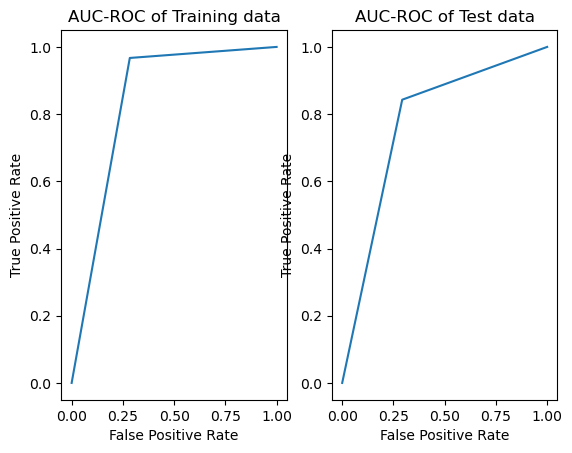

In [229]:
evaluate_model(optimized_ada_rf,X_ada,y_ada,x_test,y_test)

Observations:
1. the accuracy of the training set is 84.17%
2. the accuracy of Test se is 70.76%
3. The recall of training set is 0.96
4. The recall of test set is 0.84
5. The AOC-ROC of training set is 0.84
6. The AOC-ROC of test set is 0.77

### **11.3 Model Building With XGBoost**

In [230]:
!pip install xgboost

In [231]:
#importing packages for XGBoost
from xgboost import XGBClassifier

In [232]:
#Def for Finding the best no of trees in XG Boost
def best_XGboost(X_train, y_train, X_test, y_test):
    tree_range = range(2, 30, 5)
    score1=[]
    score2=[]
    for tree in tree_range:
        xgb=XGBClassifier(n_estimators=tree)
        xgb.fit(X_train,y_train)
        score1.append(xgb.score(X_train,y_train))
        score2.append(xgb.score(X_test,y_test))
    
    %matplotlib inline
    plt.plot(tree_range,score1,label= 'Accuracy on training set')
    plt.plot(tree_range,score2,label= 'Accuracy on testing set')
    plt.xlabel('Value of number of trees in XGboost')
    plt.ylabel('Accuracy')
    plt.legend()

#### 11.3.1 model building with Original Data

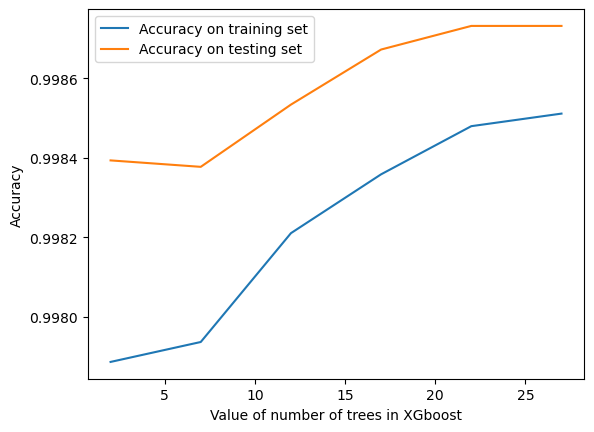

In [233]:
best_XGboost(x,y,x_test,y_test)

The best no of estimatore or trees is 26

In [234]:
xgb=XGBClassifier(n_estimators=26)
xgb.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=26, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Train Accuracy : 0.9984953824204215
 
Recall:  0.7821742605915267
 
Train Confusion Matrix:
[[1288853     316]
 [   1635    5871]]
--------------------------------------------------
Test Accuracy : 0.998722375877017
 
Recall:  0.7463869463869464
 
Test Confusion Matrix:
[[553408    166]
 [   544   1601]]

 AUC score - Training data: 0.8909645707244426
 AUC score - Test Data: 0.8730435384060734


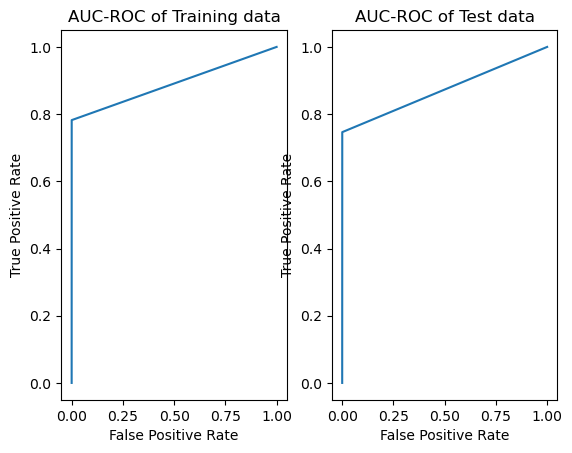

In [235]:
evaluate_model(xgb,x,y,x_test,y_test)

Observations:
1. the accuracy of the training set is 99.84%
2. the accuracy of Test se is 99.87%
3. The recall of training set is 0.78
4. The recall of test set is 0.74
5. The AOC-ROC of training set is 0.89
6. The AOC-ROC of test set is 0.87

#### 11.3.2 model building with oversampled SMOTE Data

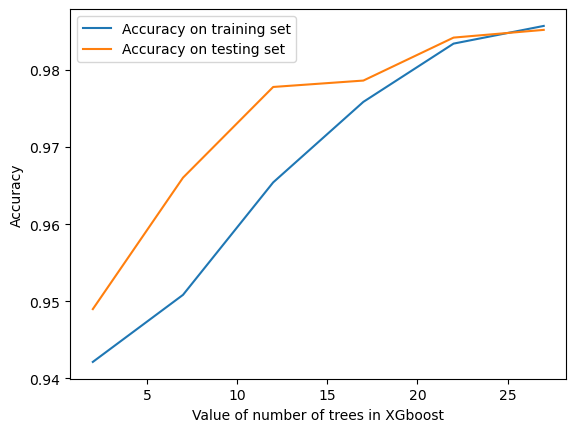

In [236]:
best_XGboost(X_smote,y_smote,x_test,y_test)

The best no of estimatore or trees is 26

In [237]:
xgb_smote=XGBClassifier(n_estimators=26)
xgb_smote.fit(X_smote,y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=26, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Train Accuracy : 0.9854247193347032
 
Recall:  0.9851640863222743
 
Train Confusion Matrix:
[[1270715   18454]
 [  19126 1270043]]
--------------------------------------------------
Test Accuracy : 0.9850625945846732
 
Recall:  0.8974358974358975
 
Test Confusion Matrix:
[[545493   8081]
 [   220   1925]]

 AUC score - Training data: 0.9854247193347033
 AUC score - Test Data: 0.9414190148807381


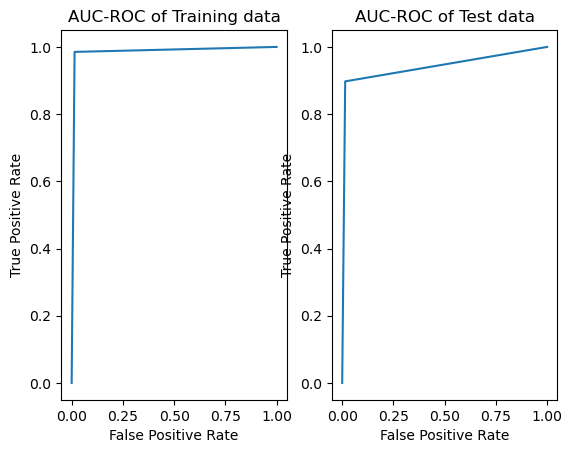

In [238]:
evaluate_model(xgb_smote,X_smote,y_smote,x_test,y_test)

Observations:
1. the accuracy of the training set is 98.54%
2. the accuracy of Test se is 98.50%
3. The recall of training set is 0.98
4. The recall of test set is 0.89
5. The AOC-ROC of training set is 0.98
6. The AOC-ROC of test set is 0.94

#### 11.3.3 model building with oversampled ADASYN Data

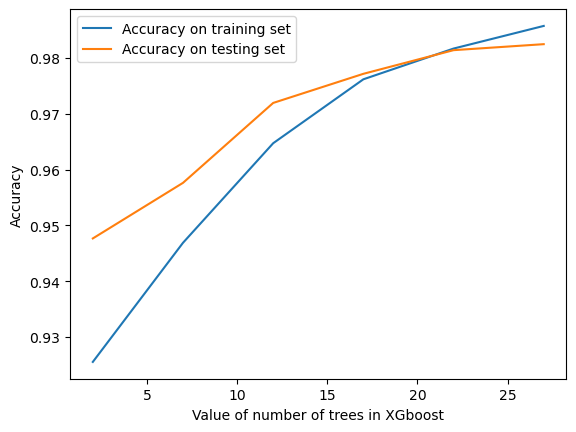

In [239]:
best_XGboost(X_ada,y_ada,x_test,y_test)

The best no of estimatore or trees is 26

In [240]:
xgb_ada=XGBClassifier(n_estimators=26)
xgb_ada.fit(X_ada,y_ada)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=26, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Train Accuracy : 0.9856423735285623
 
Recall:  0.988046027251183
 
Train Confusion Matrix:
[[1267558   21611]
 [  15425 1274941]]
--------------------------------------------------
Test Accuracy : 0.9825325389270476
 
Recall:  0.9053613053613053
 
Test Confusion Matrix:
[[544070   9504]
 [   203   1942]]

 AUC score - Training data: 0.985641257626184
 AUC score - Test Data: 0.9440964344912145


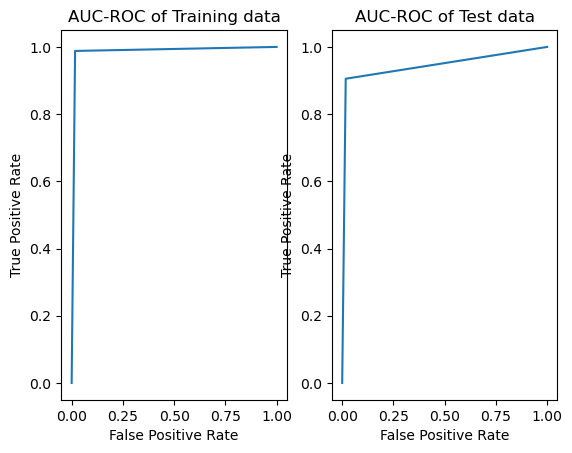

In [241]:
evaluate_model(xgb_ada,X_ada,y_ada,x_test,y_test)

Observations:
1. the accuracy of the training set is 98.56%
2. the accuracy of Test se is 98.25%
3. The recall of training set is 0.98
4. The recall of test set is 0.90
5. The AOC-ROC of training set is 0.98
6. The AOC-ROC of test set is 0.94

# **12. selecting the best model**

observations: 
1. XG boost with oversampled data using ADASYN has the heighest recall rate of 0.90 on test data
2. It has an accuracy score of98.56% on training dataset and 98.25% on test dataset
3. It has an AUC-ROC of 0.98 for training dataset and 0.94 for test data set
4. hence we select the model xgb_ada as the final model wich uses XGBoost with ADASYN oversampled data

In [245]:
#feature importance for the selected model:
xgb_ada.feature_importances_

array([0.07940377, 0.00280751, 0.00323688, 0.01745616, 0.00076456,
       0.02791491, 0.04908965, 0.05142285, 0.02776301, 0.05395648,
       0.05366556, 0.04357869, 0.03372727, 0.02985307, 0.02675691,
       0.0405653 , 0.03585125, 0.01364589, 0.00833116, 0.03466516,
       0.10719319, 0.1131152 , 0.12936275, 0.0158728 ], dtype=float32)

In [246]:
imp_df = pd.DataFrame({
    "Varname": x.columns,
    "Imp": optimized_rf_1.feature_importances_
})


In [247]:
imp_df.sort_values(by="Imp", ascending=False).head()

Varname       Imp
0            amt  0.524099
15  shopping_net  0.108878
19       morning  0.103341
23         night  0.083597
20          noon  0.065153

Observations:

The top 5 important variables that add to the model are:
1. amt
2. Shopping_net
3. morning
4. night
5. noon 


# **13. Cost Benefit Analysis**

In [249]:
#cost benefit analysis is done on the original data
#reading the original training data
df_original_training=pd.read_csv('fraudTrain.csv', index_col=0)

In [250]:
#reading the original test data
df_original_test=pd.read_csv('fraudTest.csv', index_col=0)

In [251]:
#Merging the training and test dataset:
data = pd.concat([df_original_training, df_original_test], axis=0)

In [339]:
data.to_csv('merged_data.csv')

In [254]:
data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

#### 13.1 Average no of transactions per month

In [255]:
# Since the given (original) dataset is from Jan 1 2019 to Dec 31 2020, the data is of 24 months
# Total transactions can be found by checking the shape of the original dataframe
# Avg transactions per month would be to divide that shape/total by 24 (months)

avg_transactions_pm = data.shape[0]//24

In [256]:
print("1. Average number of transactions per month are:", avg_transactions_pm)

1. Average number of transactions per month are: 77183


#### 13.2 Average no of Fraudulent transactions per month

In [257]:
avg_frdtrn_pm = data[data.is_fraud==1].shape[0]//24

In [264]:
print("2. Average number of fraudulent transactions per month are:", avg_frdtrn_pm)

2. Average number of fraudulent transactions per month are: 402


#### 13.3 Average Amount per fraudulent transaction

In [261]:
#total no of fraudulent transactions
frdtrn=data[data.is_fraud==1].shape[0]

In [262]:
#Total no of fraudulent amount
frdamt=data[data.is_fraud==1].amt.sum()

In [266]:
avg_frd_amt=frdamt//frdtrn

In [267]:
print("3. Average amount per fraud transaction:", avg_frd_amt)

3. Average amount per fraud transaction: 530.0


Comparing the cost incurred per month by the bank before and after the model deployment:

1. Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month
2. Cost incurred per month after the model is built and deployed: (Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below)
3. Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = USD 1.5

4. Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.

5. Let FN be the average number of transactions per month that are fraudulent but not detected by the model

6. Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN

7. Therefore, the cost incurred per month after the model is built and deployed = 1.5 * TF + Average amount per fraudulent transaction * FN

8. Final savings = Cost incurred before - Cost incurred after

#### 13.4 Cost incurred per month before the model was deployed :

In [268]:
cst_pm_bf=avg_frdtrn_pm*avg_frd_amt

In [269]:
print("4. Cost incurred per month before the model was deployed:", cst_pm_bf)

4. Cost incurred per month before the model was deployed: 213060.0


#### 13.5 Average number of transactions per month detected as fraudulent by the model (TF):

In [278]:
#Creaing a final analysed data for prediction of fraudulen transactions
model_data=pd.concat([df, df_test], axis=0)

In [280]:
final_x=model_data.drop('is_fraud', axis=1)
final_y=model_data.is_fraud

In [281]:
print("Test Accuracy :", accuracy_score(final_y, xgb_ada.predict(final_x)))
print(" ")
print('Recall: ',recall_score(final_y, xgb_ada.predict(final_x)))
print(" ")
print("Test Confusion Matrix:")
print(confusion_matrix(final_y, xgb_ada.predict(final_x)))

Test Accuracy : 0.9827817408175582
 
Recall:  0.9191793596518496
 
Test Confusion Matrix:
[[1811628   31115]
 [    780    8871]]


In [301]:
#predicting for the entire data
y_pred_final=xgb_ada.predict(final_x)

In [293]:
y_pred = pd.Series(y_pred_final)

In [298]:
final_pred_data=model_data
final_pred_data['y_pred']=y_pred

In [299]:
final_pred_data.head()

amt  city_pop  is_fraud  age  days_of_week  distance  food_dining  \
0    4.97      3495         0   30             2        78            0   
1  107.23       149         0   40             2        30            0   
2  220.11      4154         0   56             2       108            0   
3   45.00      1939         0   52             2        95            0   
4   41.96        99         0   32             2        77            0   

   gas_transport  grocery_net  grocery_pos  ...  shopping_net  shopping_pos  \
0              0            0            0  ...             0             0   
1              0            0            1  ...             0             0   
2              0            0            0  ...             0             0   
3              1            0            0  ...             0             0   
4              0            0            0  ...             0             0   

   travel  is_male  morning  noon  eveing  late_evening  night  y_pred  
0       0        0        0     0       0             0      0       0  
1       0        0        0     0       0             0      0       0  
2       0        1        0     0       0             0      0       1  
3       0        1        0     0       0             0      0       0  
4       0        1        0     0       0             0      0       0  

[5 rows x 26 columns]

In [300]:
final_pred_data.shape

(1852394, 26)

In [309]:
# Since the given (original) dataset is from Jan 1 2019 to Dec 31 2020, the data is of 24 months
#calculating the total no of transactions predicted as fraudulent by the model
total_fraud_pred=final_pred_data[final_pred_data.y_pred==1].shape[0]
total_fraud_pred

40826

In [313]:
avg_fpm_frad_tran_pred = final_pred_data[final_pred_data.y_pred==1].shape[0]//24

In [314]:
print("5. Average number of transactions per month detected as fraudulent by the model (TF):", avg_fpm_frad_tran_pred)

5. Average number of transactions per month detected as fraudulent by the model (TF): 1701


#### 13.6 Total cost of providing customer support per month for fraudulent transactions detected by the model 



#Cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

In [315]:
total_cost=1.5*avg_fpm_frad_tran_pred

In [318]:
print("6. Total cost of providing customer support per month for fraudulent transactions detected by the model : $",total_cost)

6. Total cost of providing customer support per month for fraudulent transactions detected by the model : $ 2551.5


#### 13.7  Average number of transactions per month that are fraudulent but not detected by the model (FN)


In [327]:
nt_detected=final_pred_data.loc[(final_pred_data.is_fraud==1)&(final_pred_data.y_pred==0)]

In [328]:
avg_nt_detected_pm=nt_detected.shape[0]//24

In [330]:
print("7. Average number of transactions per month that are fraudulent but not detected by the model (FN) :",avg_nt_detected_pm)

7. Average number of transactions per month that are fraudulent but not detected by the model (FN) : 111


#### 13.8  Cost incurred due to fraudulent transactions left undetected by the model: 


In [331]:
undetected_cost=avg_nt_detected_pm*avg_frd_amt

In [332]:
print("8.  Cost incurred due to fraudulent transactions left undetected by the model :",undetected_cost)

8.  Cost incurred due to fraudulent transactions left undetected by the model : 58830.0


#### 13.9  Cost incurred per month after the model is built and deployed 


In [334]:
cost_after_model=total_cost+undetected_cost

In [336]:
print("9.  Cost incurred per month after the model is built and deployed  :",cost_after_model)

9.  Cost incurred per month after the model is built and deployed  : 61381.5


#### 13.10 Final savings = Cost incurred before - Cost incurred after

In [337]:
final_savings=cst_pm_bf-cost_after_model

In [338]:
print("10. Final savings :",final_savings)

10. Final savings : 151678.5


# **14. Conclusion**

1. The most important features that add to the model are:
    1. amt
    2. Shopping_net
    3. morning
    4. night
    5. noon 


3. The decision tree model performs better on the unsampled data and gives an accuracy of 0.99 on both test and training data but, Since, we are working with prediction of fraudulent transactions, recall is also an important measure.

Therefore, we are selecting the XGBOOST with ADASYN oversampled data as the best model for this given problem as it give optimal precision and recall:
1. the accuracy of the training set is 98.56%
2. the accuracy of Test se is 98.25%
3. The recall of training set is 0.98
4. The recall of test set is 0.90
5. The AOC-ROC of training set is 0.98
6. The AOC-ROC of test set is 0.94

In the cost benifit analysis we found that **A average amount of $ 151678.5 per monthcould have been saved if our model was implemented by the bank**